## Naive Bayes Classifier


Text data is usually represented as strings, which in turn are concatenation of characters. The type and length of text will vary accross projects.

Due to it's nature, text is clearly very different from the numeric features and we will need to process it differently before we can do analysis with it and apply our machine learning algorithms to it. 

This notebook will cover the Naive Bayes Classifier that is one of the best ML techniques we can applly to labelled text data.

In [1]:
import os

In [2]:
os.getcwd()

'/Users/ariedamuco/Desktop/Booth/Code/ML'

In [4]:
os.chdir("/Users/ariedamuco/Desktop/Booth/")

In [5]:
os.listdir()

['.DS_Store',
 'Input',
 'Output',
 'Code',
 'Slides',
 '.gitignore',
 'Figures',
 '.git']

In [5]:
#os.chdir("../..")

In [7]:
file=open('Input/smsspamcollection/SMSSpamCollection').read()

In [9]:
type(file)

str

In [11]:
file

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s\nham\tU dun say so early hor... U c already then say...\nham\tNah I don\'t think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv\nham\tEven my brother is not like to speak with me. They treat me like aids patent.\nham\tAs per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\nspam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [12]:
file=open('Input/smsspamcollection/SMSSpamCollection').readlines()

In [15]:
file

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call

In [11]:
type(file)

list

In [12]:
len(file)

5574

In [13]:
file[0:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n"]

In [16]:
#now open the same file in pandas
import pandas as pd
data = pd.read_csv('Input/smsspamcollection/SMSSpamCollection', sep='\t',names=["label", "message"])

In [17]:
data.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
data.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [18]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [19]:
data['length'] = data['message'].apply(len)

In [20]:
data

label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160
5568   ham               Will ü b going to esplanade fr home?      36
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]

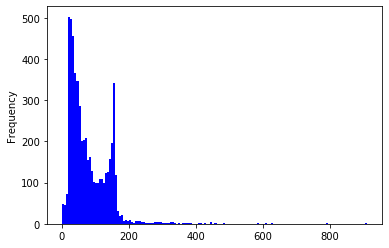

In [21]:
data['length'].plot(bins=150, kind='hist', color='blue')

In [22]:
data.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [23]:
#910 characters, let's see how this looks like, use .iloc[0] to show full message
data[data['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a891a1fd0>,
      dtype=object)

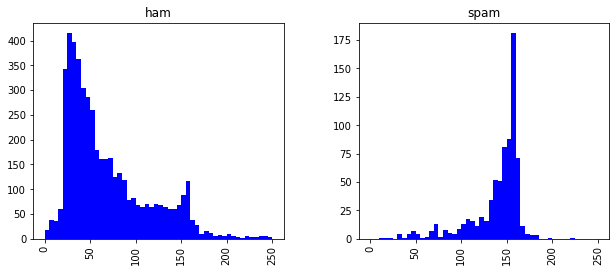

In [24]:
data.hist(column='length', by='label',color='blue', bins=50, figsize=(10,4), range=[0, 250])

## Text Pre-Processing

The classification algorithms need numerical feature vector in order to perform the classification task. 
There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number. 

### Bag of Words Approach (BOW)

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). When using this representation, we discard most of the structure of the input text and count the frequency of each word in the text. Disregarding the structure and counting only word occurrences leads to the
mental image of representing text as a `bag`. 

Computing the bag-of-words representation for a corpus of documents
consists of the following three steps: 

i) Tokenization: Split each document into the words `tokens`, for example by splitting them on whitespace and
punctuation.

ii) Vocabulary building:  Collect a vocabulary of all words that appear
in any of the documents

iii) Encoding: For each document, we count how many times each word appears.


For this purpose, we will use the NLTK library (alternatively you can load the stopwords list that I have provided you with). 
NLTK library, jointly with Spacy, are standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')# Show the vector of stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
#Alternatively 
stopwords=open('Input/nltk_stopwords.txt').readlines()

In [19]:
stopwords

['i\n',
 'me\n',
 'my\n',
 'myself\n',
 'we\n',
 'our\n',
 'ours\n',
 'ourselves\n',
 'you\n',
 "you're\n",
 "you've\n",
 "you'll\n",
 "you'd\n",
 'your\n',
 'yours\n',
 'yourself\n',
 'yourselves\n',
 'he\n',
 'him\n',
 'his\n',
 'himself\n',
 'she\n',
 "she's\n",
 'her\n',
 'hers\n',
 'herself\n',
 'it\n',
 "it's\n",
 'its\n',
 'itself\n',
 'they\n',
 'them\n',
 'their\n',
 'theirs\n',
 'themselves\n',
 'what\n',
 'which\n',
 'who\n',
 'whom\n',
 'this\n',
 'that\n',
 "that'll\n",
 'these\n',
 'those\n',
 'am\n',
 'is\n',
 'are\n',
 'was\n',
 'were\n',
 'be\n',
 'been\n',
 'being\n',
 'have\n',
 'has\n',
 'had\n',
 'having\n',
 'do\n',
 'does\n',
 'did\n',
 'doing\n',
 'a\n',
 'an\n',
 'the\n',
 'and\n',
 'but\n',
 'if\n',
 'or\n',
 'because\n',
 'as\n',
 'until\n',
 'while\n',
 'of\n',
 'at\n',
 'by\n',
 'for\n',
 'with\n',
 'about\n',
 'against\n',
 'between\n',
 'into\n',
 'through\n',
 'during\n',
 'before\n',
 'after\n',
 'above\n',
 'below\n',
 'to\n',
 'from\n',
 'up\n',
 'dow

In [21]:
stopwords=[element.replace("\n", "") for element in stopwords]

In [22]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
import re

In [29]:
#https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

In [30]:
string_original = "string. With. Punctuation?"
string_replaced = re.sub(r'\W',' ', string_original)

In [31]:
string_replaced

'string With Punctuation'

In [32]:
def remove_punct_tokenize(text):
    text = re.sub(r'[^\w\s]','', text)
    tokenized =text.lower()   
    return tokenized.split()  

You can also use the NLKT library to do the tokenization.

In [33]:
remove_punct_tokenize("I cannot stand this at all....")

['i', 'cannot', 'stand', 'this', 'at', 'all']

In [34]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
def remove_stopwords(text):
    clean_stopwords=[]
    for element in remove_punct_tokenize(text):
        if element not in stopwords:
            clean_stopwords.append(element)
    return clean_stopwords

In [36]:
remove_stopwords("I cannot stand this at all....")

['cannot', 'stand']

In [37]:
data['message'].apply( remove_stopwords )

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, 750, poun...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
#CountVectorizer Will convert text into token counts
bow_transformer = CountVectorizer()

In [40]:
bow_transformer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [41]:
bow_transformer = CountVectorizer(analyzer=remove_stopwords).fit(data['message'])

In [42]:
bow_transformer

CountVectorizer(analyzer=<function remove_stopwords at 0x7f9ac8fe0d40>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [43]:
print (len(bow_transformer.vocabulary_))

9454


In [44]:
message9 = data['message'][8]

In [45]:
message9

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [46]:
bow9 = bow_transformer.transform([message9])
print (bow9)

  (0, 218)	1
  (0, 326)	1
  (0, 915)	1
  (0, 1954)	1
  (0, 2231)	2
  (0, 2292)	1
  (0, 2578)	1
  (0, 4252)	1
  (0, 4814)	1
  (0, 5771)	1
  (0, 6612)	1
  (0, 6851)	1
  (0, 7022)	1
  (0, 7290)	1
  (0, 8789)	1
  (0, 8793)	1
  (0, 9119)	1


In [47]:
print (bow9.shape)

(1, 9454)


Let's check what tokens are stored in (0, 218) and (0, 9119)

In [48]:
print (bow_transformer.get_feature_names()[218])

09061701461


In [49]:
print (bow_transformer.get_feature_names()[9119])

winner


In [50]:
data[data['length'] == 910]

label                                            message  length
1085   ham  For me the love should start with attraction.i...     910

In [51]:
message_romeo = data['message'][1085]

In [52]:
message_romeo

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [53]:
bow_romeo = bow_transformer.transform([message_romeo])

In [54]:
bow_romeo.shape

(1, 9454)

In [55]:
print (bow_romeo)

  (0, 1172)	1
  (0, 1241)	2
  (0, 1324)	2
  (0, 1394)	1
  (0, 1568)	2
  (0, 1822)	1
  (0, 2173)	1
  (0, 2327)	1
  (0, 2508)	1
  (0, 2540)	1
  (0, 2572)	1
  (0, 2651)	2
  (0, 2927)	1
  (0, 2969)	1
  (0, 3134)	2
  (0, 3224)	4
  (0, 3384)	1
  (0, 3414)	1
  (0, 3460)	1
  (0, 3754)	1
  (0, 3777)	1
  (0, 3784)	1
  (0, 3811)	1
  (0, 4013)	1
  (0, 4022)	1
  :	:
  (0, 5383)	1
  (0, 5417)	1
  (0, 5585)	1
  (0, 5704)	1
  (0, 5705)	1
  (0, 5746)	1
  (0, 6388)	1
  (0, 6537)	1
  (0, 6661)	1
  (0, 6819)	1
  (0, 7168)	1
  (0, 7209)	1
  (0, 7498)	1
  (0, 7682)	1
  (0, 7829)	3
  (0, 8120)	1
  (0, 8198)	1
  (0, 8251)	1
  (0, 8283)	1
  (0, 8304)	1
  (0, 8306)	1
  (0, 8329)	1
  (0, 8367)	2
  (0, 9083)	1
  (0, 9220)	3


In [56]:
print (bow_transformer.get_feature_names()[3224])

every


In [57]:
import numpy as np

np.argsort(bow_transformer.get_feature_names())[::-1]

array([9453, 9452, 9451, ...,    2,    1,    0])

In [58]:
for index, s in enumerate(bow_transformer.get_feature_names()):
    if "love" in s:
        print (index, s)

492 2daylove
948 aathilove
1584 bedroomlove
1614 beloved
2003 canlove
2270 clover
2969 dreamlove
4116 herlove
4203 homelove
4312 hunlove
4544 islove
5143 love
5144 loveable
5145 loved
5146 lovejen
5147 lovely
5148 loveme
5149 lover
5150 loverakhesh
5151 loverboy
5152 lovers
5153 loves
5644 muchxxlove
6980 reslove
7195 satlove
7202 sausagelove
7570 slovely
9196 worklove


In [59]:
#transform now all dataset
data_bow = bow_transformer.transform(data['message'])

In [60]:
#now scikit learn

from sklearn.feature_extraction.text import TfidfTransformer

In [61]:

tfidf_transformer = TfidfTransformer().fit(data_bow)

In [62]:
tfidf_transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [63]:
tfidf9 = tfidf_transformer.transform(bow9)
print (tfidf9)

  (0, 9119)	0.23504242276190376
  (0, 8793)	0.2417608717879622
  (0, 8789)	0.22310978582586533
  (0, 7290)	0.2153882708405334
  (0, 7022)	0.2570497663029066
  (0, 6851)	0.29506543469242547
  (0, 6612)	0.1793504751988651
  (0, 5771)	0.2153882708405334
  (0, 4814)	0.29506543469242547
  (0, 4252)	0.22612067118357726
  (0, 2578)	0.1919846371928806
  (0, 2292)	0.2142536330398757
  (0, 2231)	0.3414894763386853
  (0, 1954)	0.11556449460880888
  (0, 915)	0.2534039392300523
  (0, 326)	0.23714023792653083
  (0, 218)	0.29506543469242547


In [64]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['claim']])

4.934340905340393


In [65]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])

4.484025231066877


In [66]:
data_tfidf = tfidf_transformer.transform(data_bow)
print (data_tfidf.shape)

(5572, 9454)


In [67]:

#why naive bayes?
#http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf
from sklearn.naive_bayes import MultinomialNB

In [68]:
spam_detect_model = MultinomialNB().fit(data_tfidf.toarray() , data['label'])

In [69]:

all_predictions = spam_detect_model.predict(data_tfidf)
print (all_predictions)


['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [70]:

true_val=data['label']

In [71]:
from sklearn.metrics import classification_report
print (classification_report(data['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.91       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [72]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=1)

In [73]:
from sklearn.pipeline import Pipeline
#create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=remove_stopwords)),  # strings to token integer counts
    ('tfidf', TfidfTransformer( )),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [74]:
#Now we can directly pass message text data and the pipeline will do our pre-processing for us!
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)

print (classification_report(predictions, label_test))


from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(label_test,predictions).ravel()
confusion_matrix(label_test, predictions)

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1005
        spam       0.75      1.00      0.86       110

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115



array([[968,   0],
       [ 37, 110]])